In [514]:
import pandas as pd
import numpy as np
from datetime import datetime
import plotly.express as px
from sklearn.model_selection import train_test_split
import warnings
import matplotlib.pyplot as plt
import math
warnings.filterwarnings(action='ignore') 
pd.set_option('display.max_columns', None)

In [515]:
original_data = pd.read_excel("superstore.xls",index_col=0)#,usecols=[0,1,2,3])

In [516]:
# load된 데이터의 형태(shape)을 확인해보세요.
original_data.shape

(9994, 20)

In [517]:
original_data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
Row ID,,,,,,,,,,,,,,,,,,,,
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [518]:
original_date=original_data[:]['Order Date']
new_date_list=[]
for i in range(len(original_date)):
    new_date_list.append(str(original_date[i+1].year)+'-Q'+str(original_date[i+1].quarter))
Orderd_date=pd.Series(new_date_list)

In [519]:
original_data.insert(1,'Order_date[Q]',Orderd_date)

In [520]:
new_data=original_data.groupby(["Order_date[Q]"]).sum()
new_data2=original_data.groupby(["Quantity"]).sum()

In [521]:
new_data.head(30)
# print(new_data.loc['Order Date[Q]'][:])

,Postal Code,Sales,Quantity,Discount,Profit
Order_date[Q],,,,,
2014-Q1,15605965,83372.6130,1022,40.00,3760.1329
2014-Q2,20502291,87892.8626,1550,56.27,13757.2328
2014-Q3,32539725,153355.1348,2109,84.62,18487.8044
2014-Q4,42963578,162521.0882,2870,119.62,20390.9172
2015-Q1,14181731,54804.0860,922,35.70,8671.7522
2015-Q2,23697253,98188.1490,1644,70.15,12942.2645
2015-Q3,30626077,137982.3094,2158,93.86,18032.5859
2015-Q4,44653087,175296.2286,3097,124.83,19585.8804
2016-Q1,17581735,78572.4950,1255,58.82,8380.1633


In [535]:
k=new_data[:]['Sales'].values.max()/new_data[:]['Quantity'].max()

In [536]:
SpQ=new_data[:]['Sales']/knew_data

<IPython.core.display.Javascript object>


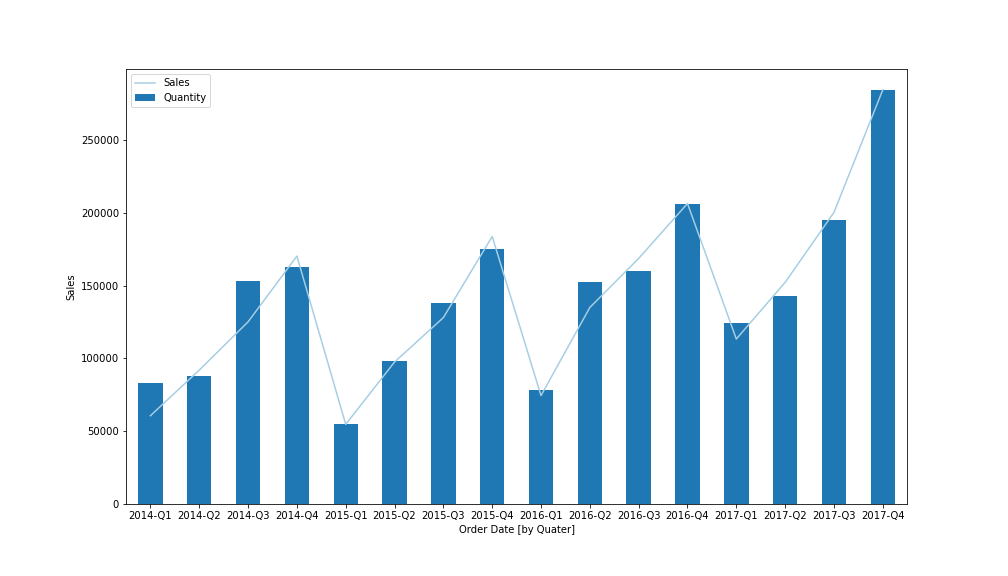

In [533]:
%matplotlib notebook
plt.figure(figsize=(14,8))
new_data[:]['Sales'].plot(kind="bar",legend='Sales')
knew_data=k*new_data[:]['Quantity']
knew_data.plot(legend='Quantity',colormap='Paired')
plt.xlabel("Order Date [by Quater]")
plt.ylabel("Sales")
plt.show()

In [524]:
knew_data

Order_date[Q]
2014-Q1     60613.036093
2014-Q2     91927.794466
2014-Q3    125081.108728
2014-Q4    170214.690399
2015-Q1     54682.210644
2015-Q2     97502.770389
2015-Q3    127987.213199
2015-Q4    183677.664169
2016-Q1     74431.859390
2016-Q2    134926.278974
2016-Q3    168613.367527
2016-Q4    206333.417386
2017-Q1    113278.766084
2017-Q2    152184.981032
2017-Q3    200224.667173
2017-Q4    284383.080300
Name: Quantity, dtype: float64